In [3]:
import tensorflow as tf

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [5]:
from tensorflow.keras.layers import Layer

In [6]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dense, MaxPool2D,Conv2D
from keras.models import Model
from keras.layers import Input, Activation, Add
from keras.regularizers import l2
from keras.optimizers import Adam, Adagrad,Adadelta,Adamax,RMSprop

In [7]:
fldr="./UTkFace"

In [8]:
import os
flies=os.listdir(fldr)

In [9]:
ages=[]
genders=[]
images=[]
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)


./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

In [10]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

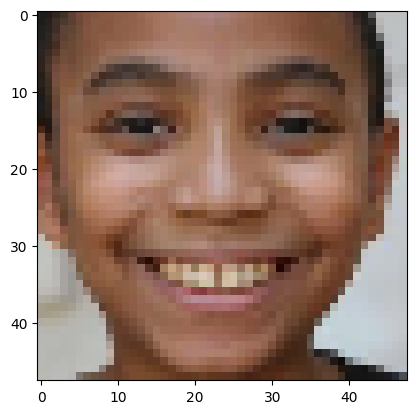

In [11]:
plt.imshow(images[87])

In [76]:
print(ages[87])

10


In [13]:
print(genders[87])

0


In [14]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)


In [15]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [16]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


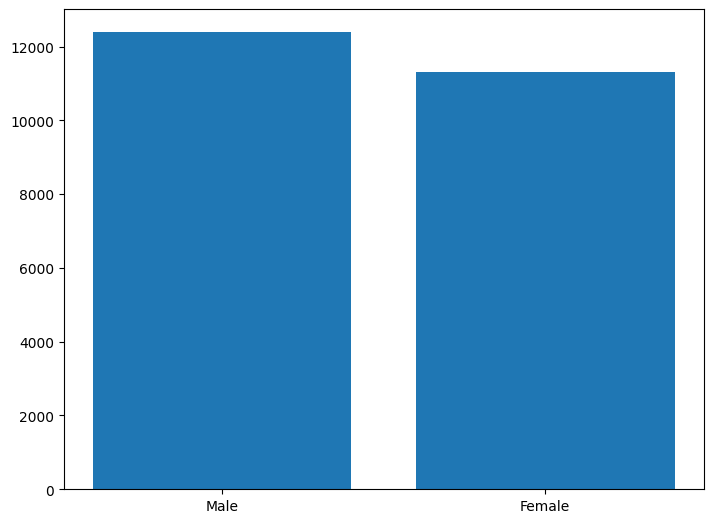

In [17]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [18]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [19]:
val=values.tolist()
cnt=counts.tolist()

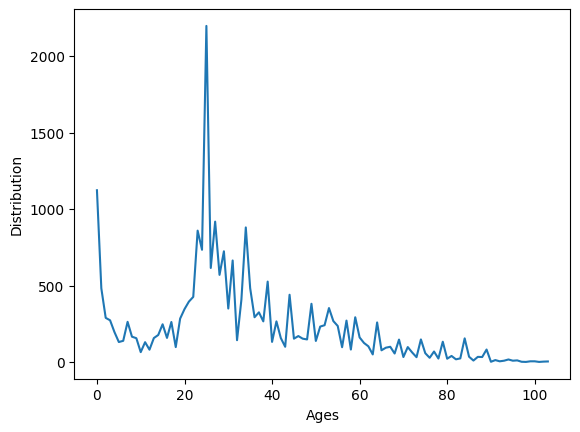

In [20]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [21]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [22]:
images_f_2=images_f/255

In [23]:
images_f_2.shape

(23708, 48, 48, 3)

In [24]:
labels_f=np.array(labels)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(images_f_2,labels_f,test_size=0.25)

In [27]:
ytrain[0:5]

array([[50,  0],
       [29,  1],
       [72,  1],
       [29,  1],
       [26,  1]])

In [28]:
ytrain_2=[ytrain[:,1],ytrain[:,0]]
ytest_2=[ytest[:,1],ytest[:,0]]

In [29]:
ytrain_2[0][0:5]

array([0, 1, 1, 1, 1])

In [30]:
ytrain_2[1][0:5]

array([50, 29, 72, 29, 26])

In [31]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [32]:
def createmodel(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense1=Dense(64,activation='relu')(flatten)
    dense2=Dense(64,activation='relu')(flatten)
    drop1=Dropout(0.2)(dense1)
    drop2=Dropout(0.2)(dense2)
    output1=Dense(1,activation='sigmoid',name='sex_out')(drop1)
    output2=Dense(1,activation='relu',name='age_out')(drop2)
    model=Model(inputs=[inputs],outputs=[output1,output2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics={"sex_out": "accuracy", "age_out": "mae"})
    return model

In [33]:
model=createmodel((48,48,3)) 

In [34]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from keras.callbacks import ModelCheckpoint

In [36]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Earlystop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Earlystop]

In [37]:
History=model.fit(xtrain,ytrain_2,batch_size=64,validation_data=(xtest,ytest_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - age_out_mae: 17.9234 - loss: 18.8438 - sex_out_accuracy: 0.5487
Epoch 1: val_loss improved from inf to 19.39623, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 76s 240ms/step - age_out_mae: 17.9180 - loss: 18.8382 - sex_out_accuracy: 0.5487 - val_age_out_mae: 18.5621 - val_loss: 19.3962 - val_sex_out_accuracy: 0.5247
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - age_out_mae: 14.7993 - loss: 15.6111 - sex_out_accuracy: 0.5854
Epoch 2: val_loss improved from 19.39623 to 15.26351, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 57s 206ms/step - age_out_mae: 14.7962 - loss: 15.6080 - sex_out_accuracy: 0.5855 - val_age_out_mae: 14.4969 - val_loss: 15.2635 - val_sex_out_accuracy: 0.7434
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - age_out_mae: 11.4948 - loss: 12.2757 - sex_out_accuracy: 0.7162
Epoch 3: val_loss improved from 15.26351 to 13.09459, saving model to Age_Sex_

In [38]:
model.evaluate(xtest,ytest_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - age_out_mae: 6.2319 - loss: 7.4328 - sex_out_accuracy: 0.8786


[7.472628593444824, 6.29156494140625, 0.8837523460388184]

In [39]:
pred=model.predict(xtest)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [40]:
pred[1]

array([[40.684868 ],
       [24.646393 ],
       [19.428314 ],
       ...,
       [ 2.1027727],
       [25.011105 ],
       [27.914356 ]], dtype=float32)

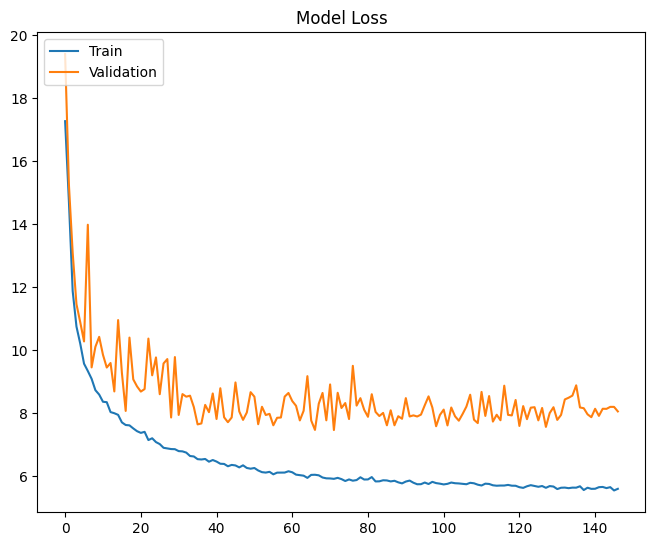

In [41]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


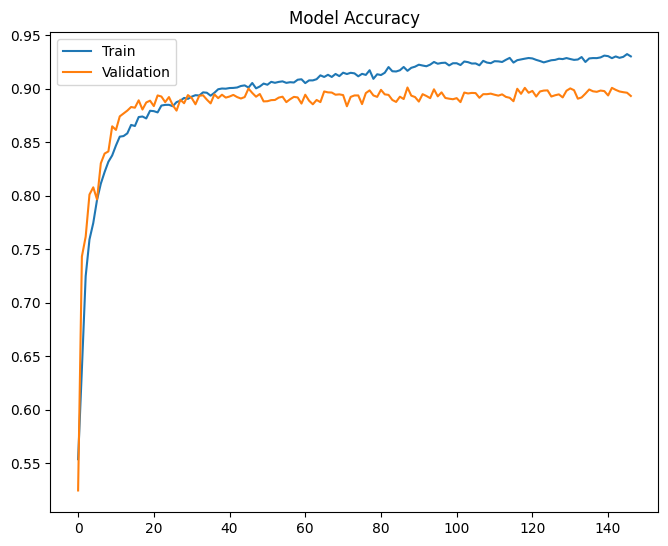

In [42]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


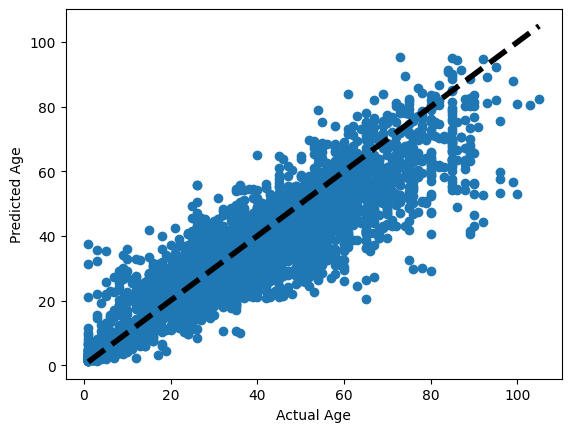

In [43]:
fig,ax=plt.subplots()
ax.scatter(ytest_2[1],pred[1])
ax.plot([ytest_2[1].min(),ytest_2[1].max()],[ytest_2[1].min(),ytest_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [44]:
i=0
predl=[]
while(i<len(pred[0])):
    predl.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\HP\AppData\Local\Temp\ipykernel_15908\2751321211.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predl.append(int(np.round(pred[0][i])))


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
report=classification_report(ytest_2[0],predl)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3110
           1       0.84      0.94      0.88      2817

    accuracy                           0.88      5927
   macro avg       0.89      0.89      0.88      5927
weighted avg       0.89      0.88      0.88      5927



In [47]:
results=confusion_matrix(ytest_2[0],predl)

<Axes: >

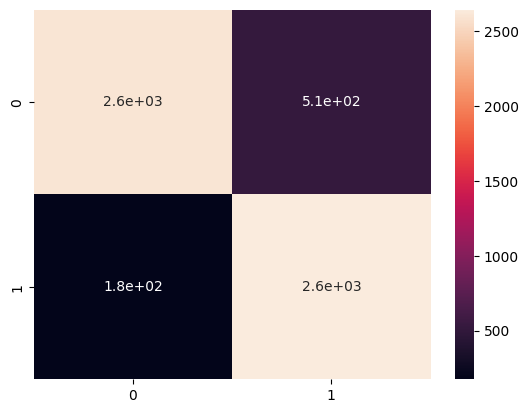

In [51]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [60]:
def testimage(ind,images_f,images_f_2,model):
    plt.imshow(images_f[ind])
    imagetest=images_f_2[ind]
    predl=model.predict(np.array([imagetest]))
    sexf=['Male','Female']
    age=int(np.round(predl[1][0]))
    sex=int(np.round(predl[0][0]))
    print("Predicted Age is: "+str(age))
    print("Predicted Gender is: "+sexf[sex])
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Age is: 92
Predicted Gender is: Female


C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(predl[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(predl[0][0]))


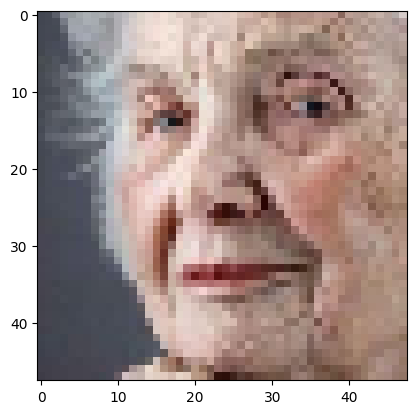

In [61]:
testimage(4,images_f,images_f_2,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Age is: 9
Predicted Gender is: Male


C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(predl[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(predl[0][0]))


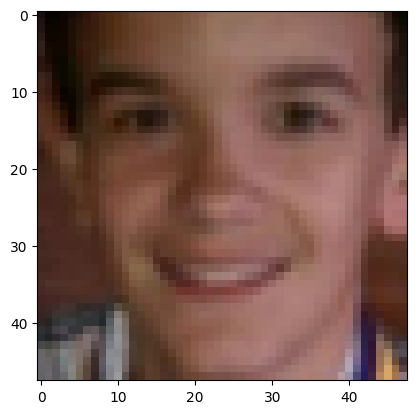

In [63]:
testimage(23,images_f,images_f_2,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age is: 15
Predicted Gender is: Female


C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(predl[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(predl[0][0]))


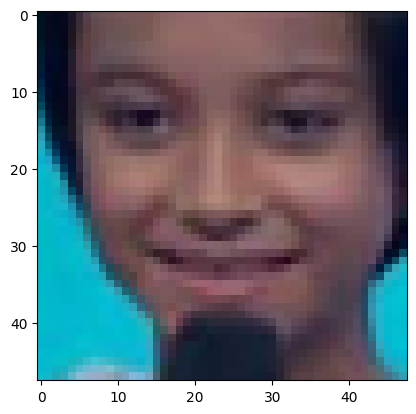

In [64]:
testimage(168,images_f,images_f_2,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Age is: 15
Predicted Gender is: Male


C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(predl[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(predl[0][0]))


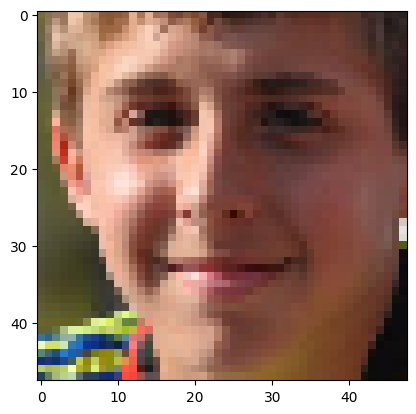

In [65]:
testimage(888,images_f,images_f_2,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age is: 23
Predicted Gender is: Female


C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(predl[1][0]))
C:\Users\HP\AppData\Local\Temp\ipykernel_15908\382190281.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(predl[0][0]))


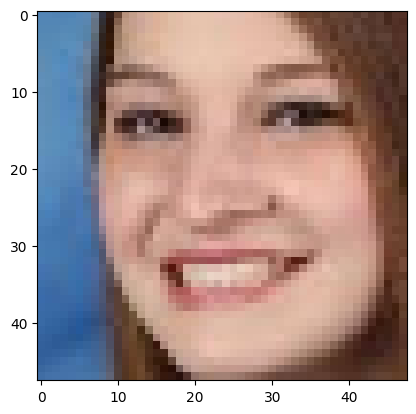

In [66]:
testimage(1288,images_f,images_f_2,model)